Task: Write a solution to report the fraction of players that logged in again on the day after the day they first logged in, rounded to 2 decimal places. In other words, you need to count the number of players that logged in for at least two consecutive days starting from their first login date, then divide that number by the total number of players.

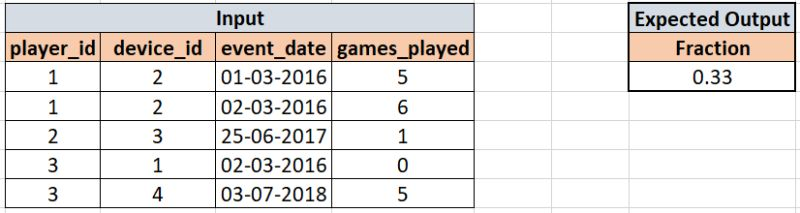

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('challenges').getOrCreate()

In [2]:
data = [
 (1,2,'2016-03-01',5),
 (1,2,'2016-03-02',6),
 (2,3,'2017-06-25',1),
 (3,1,'2016-03-02',0),
 (3,4,'2018-07-03',5)
]

schema = ["player_id","device_id","event_date","games_played"]

df_input = spark.createDataFrame(data, schema)

df_input.show()

+---------+---------+----------+------------+
|player_id|device_id|event_date|games_played|
+---------+---------+----------+------------+
|        1|        2|2016-03-01|           5|
|        1|        2|2016-03-02|           6|
|        2|        3|2017-06-25|           1|
|        3|        1|2016-03-02|           0|
|        3|        4|2018-07-03|           5|
+---------+---------+----------+------------+



In [16]:
from pyspark.sql.window import Window
from pyspark.sql.functions import *

window_spec = Window.partitionBy('player_id').orderBy('event_date')

df = df_input.withColumn('Leading_event_date',lead('event_date').over(window_spec))

df.show()

consecutive_logins_count = df.filter(datediff(col("Leading_event_date"),col("event_date"))==lit(1)).count()

total_players = df.select('player_id').distinct().count()

+---------+---------+----------+------------+------------------+
|player_id|device_id|event_date|games_played|Leading_event_date|
+---------+---------+----------+------------+------------------+
|        1|        2|2016-03-01|           5|        2016-03-02|
|        1|        2|2016-03-02|           6|              NULL|
|        2|        3|2017-06-25|           1|              NULL|
|        3|        1|2016-03-02|           0|        2018-07-03|
|        3|        4|2018-07-03|           5|              NULL|
+---------+---------+----------+------------+------------------+



In [19]:
print('Fraction: ',consecutive_logins_count/total_players)

Fraction:  0.3333333333333333
